In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv('../mini_project_1/walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [257]:
# age : obj
# occupation : int
# stayoInCurrentCityYears : obj
# obj -> int is more better to analysis? or the opposite...
# purchase 는 구매횟수 이므로, object로 바꾸기 보다는 int로 유지하는게 좋을 듯
# userId, occupation, MaritalStatus, ProductCategory 모두  object로 바꾸는게 좋을 듯

df['User_ID'] = df['User_ID'].astype('object')
df['Occupation'] = df['Occupation'].astype('object')
df['Marital_Status'] = df['Marital_Status'].astype('object')
df['Product_Category'] = df['Product_Category'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [259]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [261]:
df.describe(include = 'object').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


In [265]:
# Number of purchases by age group
purchase_count_age = df.groupby('Age')['Purchase'].count()
print(purchase_count_age)

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Purchase, dtype: int64


In [305]:
# Number of purchases by gender
purchase_count_gender = df.groupby('Gender')['Purchase'].count()
print(purchase_count_gender)

Gender
F    135809
M    414259
Name: Purchase, dtype: int64


In [321]:
# Number of purchases by gender
male = 414259
female = 135809
total_gender = male + female

male_per = (male/total_gender)*100
female_per = (female/total_gender)*100

print(f'Male: {male_per:.2f}%')
print(f'Female: {female_per:.2f}%')

Male: 75.31%
Female: 24.69%


In [267]:
# Number of purchases by Product Id (descending)
purchase_count_Product_ID = df.groupby('Product_ID')['Purchase'].count()
purchase_count_Product_ID = purchase_count_Product_ID.sort_values(ascending=False)
# print(purchase_count_Product_ID)
purchase_count_Product_ID.head(20)

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
Name: Purchase, dtype: int64

In [269]:
# Number of purchases by Occupation
purchase_count_occupation = df.groupby('Occupation')['Purchase'].count()
print(purchase_count_occupation)

Occupation
0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Purchase, dtype: int64


In [271]:
# Number of purchases by Occupation (desceding by num of purchases)
purchase_count_occupation = df.groupby('Occupation')['Purchase'].count()
purchase_count_occupation = purchase_count_occupation.sort_values(ascending = False)
print(purchase_count_occupation)

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Purchase, dtype: int64


In [273]:
# Number of purchases by City_Category (desceding by num of purchases)
purchase_count_City_Category = df.groupby('City_Category')['Purchase'].count()
purchase_count_City_Category = purchase_count_City_Category.sort_values(ascending = False)
print(purchase_count_City_Category)

City_Category
B    231173
C    171175
A    147720
Name: Purchase, dtype: int64


In [275]:
# Number of purchases by Stay_In_Current_City_Years (desceding by num of purchases)
purchase_count_stay_years = df.groupby('Stay_In_Current_City_Years')['Purchase'].count()
purchase_count_stay_years = purchase_count_stay_years.sort_values(ascending = False)
print(purchase_count_stay_years)

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Purchase, dtype: int64


In [277]:
# number of purchases by marital status
purchase_count_maritalStatus = df.groupby('Marital_Status')['Purchase'].count()
print(purchase_count_maritalStatus)

Marital_Status
0    324731
1    225337
Name: Purchase, dtype: int64


In [279]:
# number of purchases by product category
purchase_count_category = df.groupby('Product_Category')['Purchase'].count()
# purchase_count_category = purchase_count_category.sort_values(ascending = False)
print(purchase_count_category)

Product_Category
1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Purchase, dtype: int64


In [329]:
# 결측치 확인
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [331]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

* encoding 파악필요
1. Occupation : 0 ~ 20
2. City_Category : A ~ C
3. Marital_Status : 0, 1
4. Stay_In_Current_City_Years : 0 ~ 4+
5. Product_Category : 1 ~ 20

### 시각화

In [281]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

In [283]:
base1 = sns.color_palette('coolwarm')[1]
base2 = sns.color_palette('coolwarm')[4]

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\2809136608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Gender',  palette = 'coolwarm')


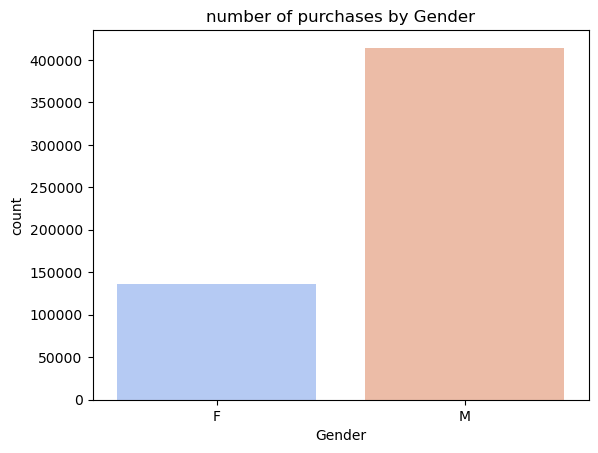

In [285]:
sns.countplot(data = df, x = 'Gender',  palette = 'coolwarm')
plt.title('number of purchases by Gender')
plt.show()

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\2123716655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_copy, x = 'Marital_Status', palette = {"Not Married":base2, "Married":base1})


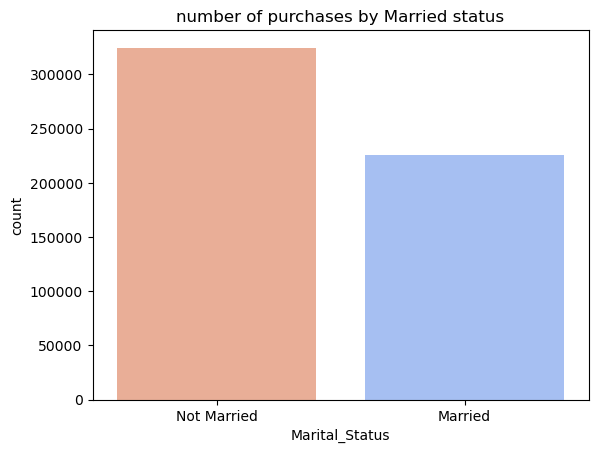

In [287]:
df_copy = df.copy()
df_copy.loc[df_copy['Marital_Status'] == 0, 'Marital_Status'] = 'Not Married'
df_copy.loc[df_copy['Marital_Status'] == 1, 'Marital_Status'] = 'Married'

sns.countplot(data = df_copy, x = 'Marital_Status', palette = {"Not Married":base2, "Married":base1})
plt.title('number of purchases by Married status')
plt.show()

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\1253932002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = occ_df, x = 'Occupation', y = 'purchase count by occupation', palette = colors)


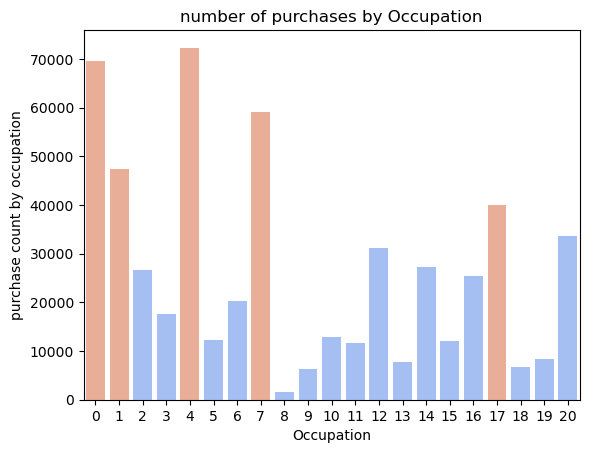

In [289]:
# 1. df.groupby(['Occupation']): 데이터프레임을 Occupation을 기준으로 그룹화한다.
# 2. .size(): 각 그룹의 크기(즉, Occupation별 데이터의 개수)를 계산한다.
# 3. .to_frame("purchase_count_occupation"): 계산된 그룹의 크기(개수)를 데이터프레임으로 변환한다. 새로운 데이터프레임의 컬럼 이름을 "purchase_count_occupation"으로 설정
# 4. .reset_index(): 그룹화된 데이터의 인덱스를 초기화합니다. Occupation 컬럼은 원래 인덱스 역할을 하게 되는데, 이를 데이터프레임의 열로 이동시키고 인덱스를 다시 설정합니다.
# purchase_count_occupation 은 위에서 기존의 occupation을 값을 기준으로 내림차순하여 출력해 놓은 컬럼이다. (이걸 굳이 안써도 된다.)

occ_df = df.groupby(['Occupation']).size().to_frame("purchase count by occupation").reset_index() 
top_5_values = occ_df['purchase count by occupation'].nlargest(5).values

colors = [base1 if i not in top_5_values else base2 for i in occ_df['purchase count by occupation']]

sns.barplot(data = occ_df, x = 'Occupation', y = 'purchase count by occupation', palette = colors)
plt.title('number of purchases by Occupation')
plt.show()

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\633392420.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = age_df, x = 'Age', y = 'purchase count by age', palette = colors)


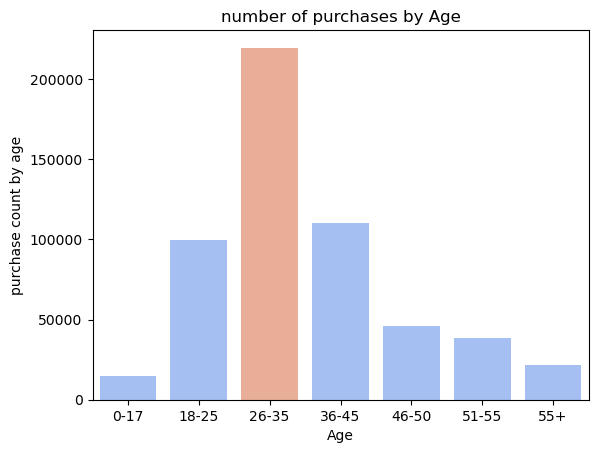

In [291]:
# sns.countplot(data = df, x = 'Age',  palette = 'Paired', order = sorted(df_copy['Age'].unique()))

age_df = df.groupby(['Age']).size().to_frame("purchase count by age").reset_index() 
top_1_age = age_df['purchase count by age'].nlargest(1).values

colors = [base1 if i not in top_1_age else base2 for i in age_df['purchase count by age']]

sns.barplot(data = age_df, x = 'Age', y = 'purchase count by age', palette = colors)
plt.title('number of purchases by Age')
plt.show()

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\3008011053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'City_Category',  palette = {'A' : base1, 'B': base2, 'C' : base1}, order = sorted(df['City_Category'].unique()))


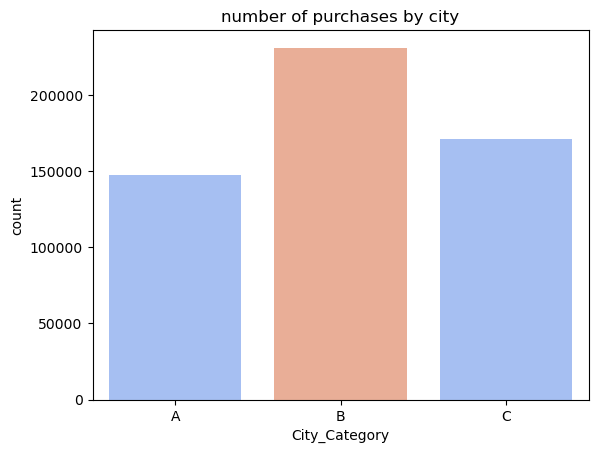

In [293]:
sns.countplot(data = df, x = 'City_Category',  palette = {'A' : base1, 'B': base2, 'C' : base1}, order = sorted(df['City_Category'].unique()))
plt.title('number of purchases by city')
plt.show()

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\176084876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Stay_In_Current_City_Years',  palette = {'0' : base1, '1' : base2, '2': base1, '3' : base1, '4+' : base1}, order = sorted(df['Stay_In_Current_City_Years'].unique()))


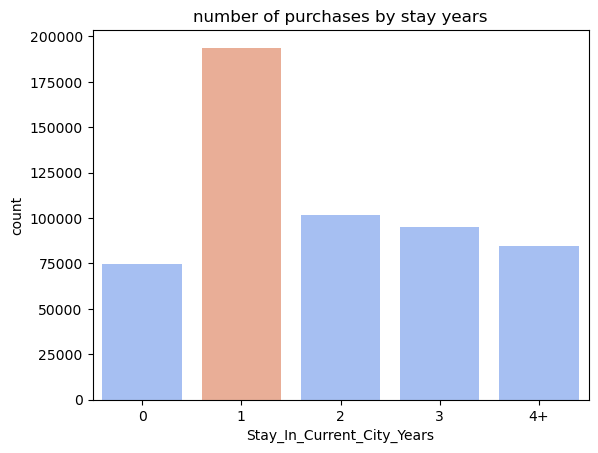

In [295]:
# 1. city에 산 햇수에 따른 구매횟수(1)

sns.countplot(data = df, x = 'Stay_In_Current_City_Years',  palette = {'0' : base1, '1' : base2, '2': base1, '3' : base1, '4+' : base1}, order = sorted(df['Stay_In_Current_City_Years'].unique()))
plt.title('number of purchases by stay years')
plt.show()

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\133146183.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = stayYear_df, x = 'Stay_In_Current_City_Years', y = 'purchase count by stay year', palette = colors)


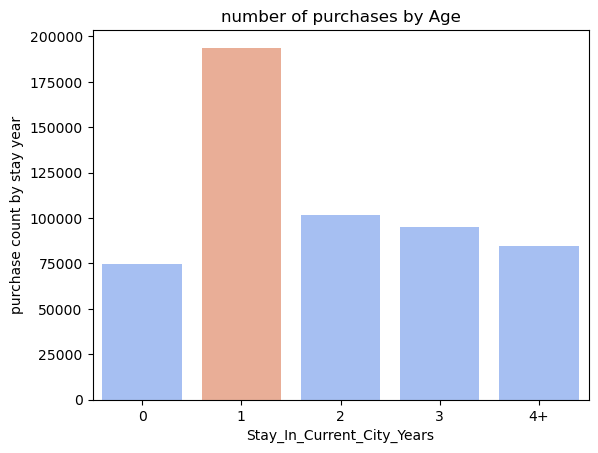

In [297]:
# 2. city에 산 햇수에 따른 구매횟수(2)

stayYear_df = df.groupby(['Stay_In_Current_City_Years']).size().to_frame("purchase count by stay year").reset_index() 
top_1_year = stayYear_df['purchase count by stay year'].nlargest(1).values

colors = [base1 if i not in top_1_year else base2 for i in stayYear_df['purchase count by stay year']]

sns.barplot(data = stayYear_df, x = 'Stay_In_Current_City_Years', y = 'purchase count by stay year', palette = colors)
plt.title('number of purchases by Age')
plt.show()

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\3003675713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = pID_df, x = 'Product_ID', y = 'purchase count by product ID', palette = colors)


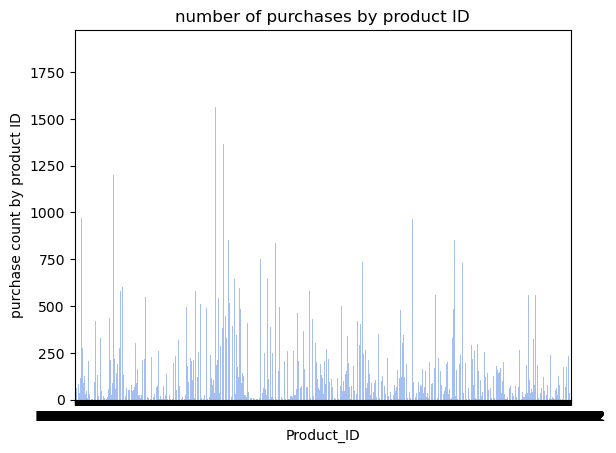

In [299]:
pID_df = df.groupby(['Product_ID']).size().to_frame("purchase count by product ID").reset_index() 
top_5_pID = pID_df['purchase count by product ID'].nlargest(1).values

colors = [base1 if i not in top_5_pID else base2 for i in pID_df['purchase count by product ID']]

sns.barplot(data = pID_df, x = 'Product_ID', y = 'purchase count by product ID', palette = colors)
plt.title('number of purchases by product ID')
plt.show()

C:\Users\HHS\AppData\Local\Temp\ipykernel_3688\111190834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = category_df, x = 'Product_Category', y = 'purchase count by product Category', palette = colors)


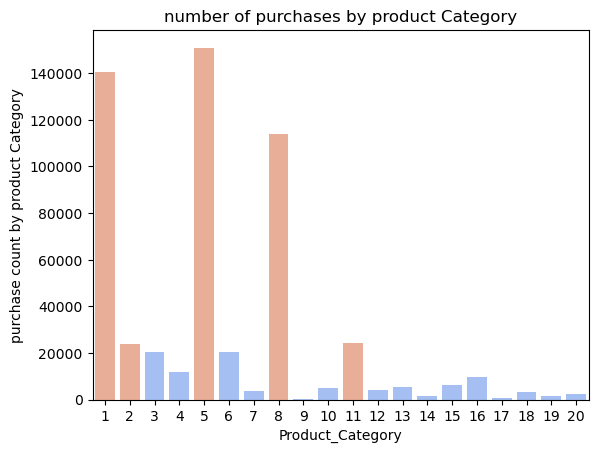

In [300]:
category_df = df.groupby(['Product_Category']).size().to_frame("purchase count by product Category").reset_index() 
top_5_category = category_df['purchase count by product Category'].nlargest(5).values

colors = [base1 if i not in top_5_category else base2 for i in category_df['purchase count by product Category']]

sns.barplot(data = category_df, x = 'Product_Category', y = 'purchase count by product Category', palette = colors)
plt.title('number of purchases by product Category')
plt.show()

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


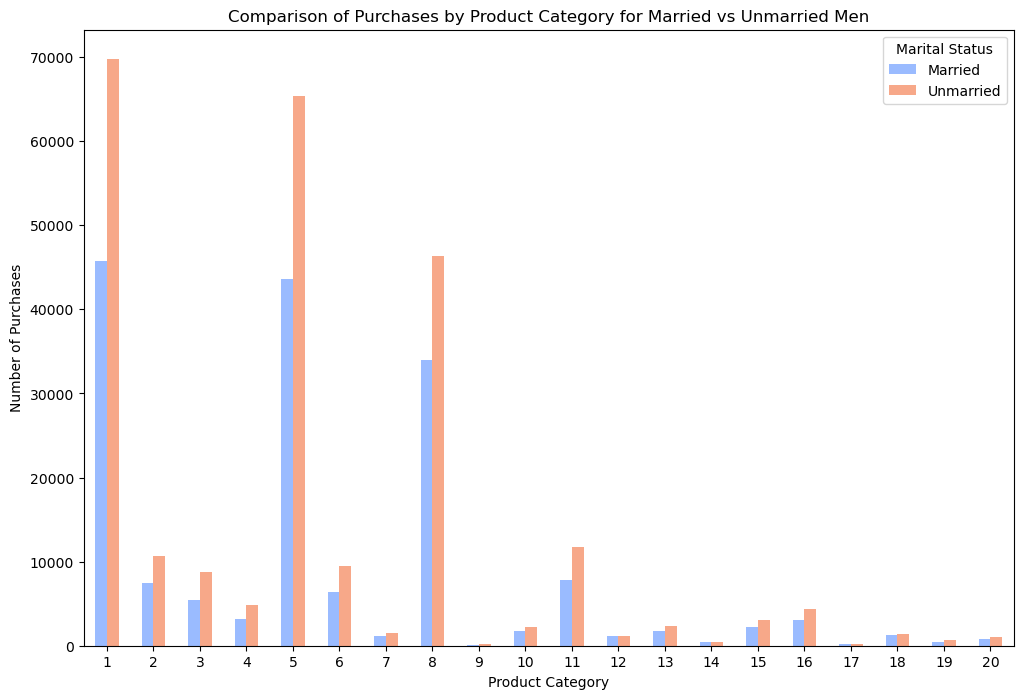

In [341]:
# 혼인 여부에 따라 미혼 여성과 기혼 여성의 상품 카테고리별 구매 수를 비교한다.
# 비교를 통해, 차이가 큰 것은 혼인 여부에 따라 구매 패턴이 달라짐을 예측해볼 수 있다.

# 데이터 분할
married_men = df[(df['Marital_Status'] == 1) & (df['Gender'] == 'M')]
unmarried_men = df[(df['Marital_Status'] == 0) & (df['Gender'] == 'M')]

# Product_Category 별 구매 수 계산
married_product_counts = married_men['Product_Category'].value_counts().sort_index()
unmarried_product_counts = unmarried_men['Product_Category'].value_counts().sort_index()

# 데이터프레임 결합
product_counts_df = pd.DataFrame({
    'Married': married_product_counts,
    'Unmarried': unmarried_product_counts
}).fillna(0)

# 시각화
product_counts_df.plot(kind='bar', figsize=(12, 8), color=[base1, base2])
plt.title('Comparison of Purchases by Product Category for Married vs Unmarried Men')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Marital Status')
plt.show()


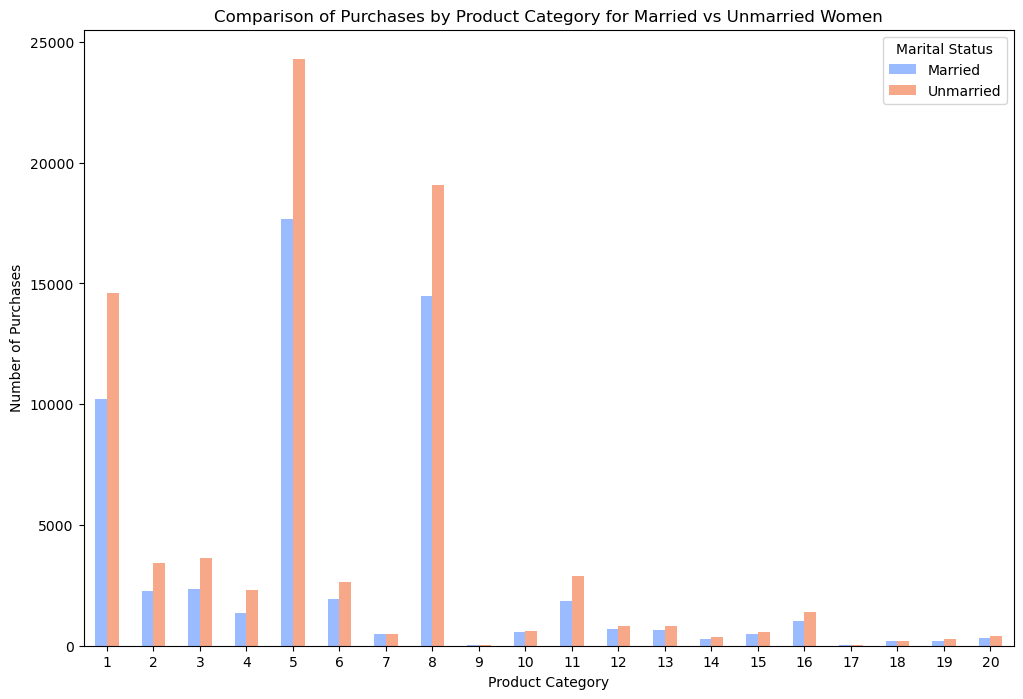

In [343]:
# 혼인 여부에 따라 미혼 여성과 기혼 여성의 상품 카테고리별 구매 수를 비교한다.

# 데이터 분할
married_women = df[(df['Marital_Status'] == 1) & (df['Gender'] == 'F')]
unmarried_women = df[(df['Marital_Status'] == 0) & (df['Gender'] == 'F')]

# Product_Category 별 구매 수 계산
married_product_counts2 = married_women['Product_Category'].value_counts().sort_index()
unmarried_product_counts2 = unmarried_women['Product_Category'].value_counts().sort_index()

# 데이터프레임 결합
product_counts_df2 = pd.DataFrame({
    'Married': married_product_counts2,
    'Unmarried': unmarried_product_counts2
}).fillna(0)

# 시각화
product_counts_df2.plot(kind='bar', figsize=(12, 8), color=[base1, base2])
plt.title('Comparison of Purchases by Product Category for Married vs Unmarried Women')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Marital Status')
plt.show()


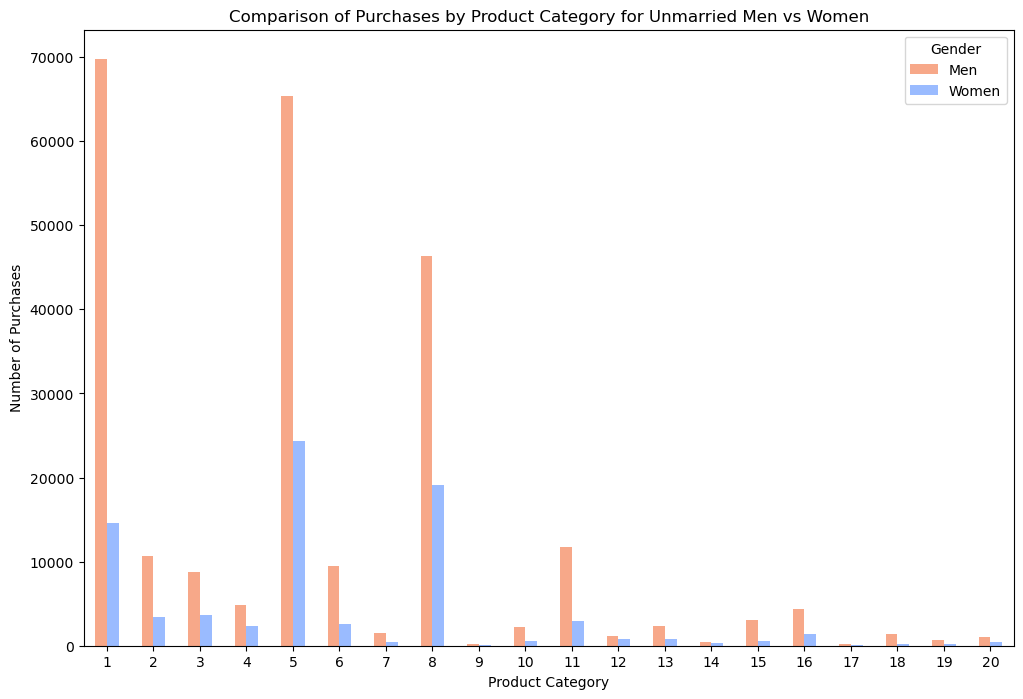

In [351]:
# 미혼 남성 vs 여성 간 상품 카테고리별 구매 수를 비교한다.

# 데이터 분할
unmarried_men = df[(df['Marital_Status'] == 0) & (df['Gender'] == 'M')]
unmarried_women = df[(df['Marital_Status'] == 0) & (df['Gender'] == 'F')]

# Product_Category 별 구매 수 계산
unmarried_product_counts = unmarried_men['Product_Category'].value_counts().sort_index()
unmarried_product_counts2 = unmarried_women['Product_Category'].value_counts().sort_index()

# 데이터프레임 결합
product_counts_df_mf = pd.DataFrame({
    'Men': unmarried_product_counts,
    'Women': unmarried_product_counts2
}).fillna(0)

# 시각화
product_counts_df_mf.plot(kind='bar', figsize=(12, 8), color=[base2, base1])
plt.title('Comparison of Purchases by Product Category for Unmarried Men vs Women')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


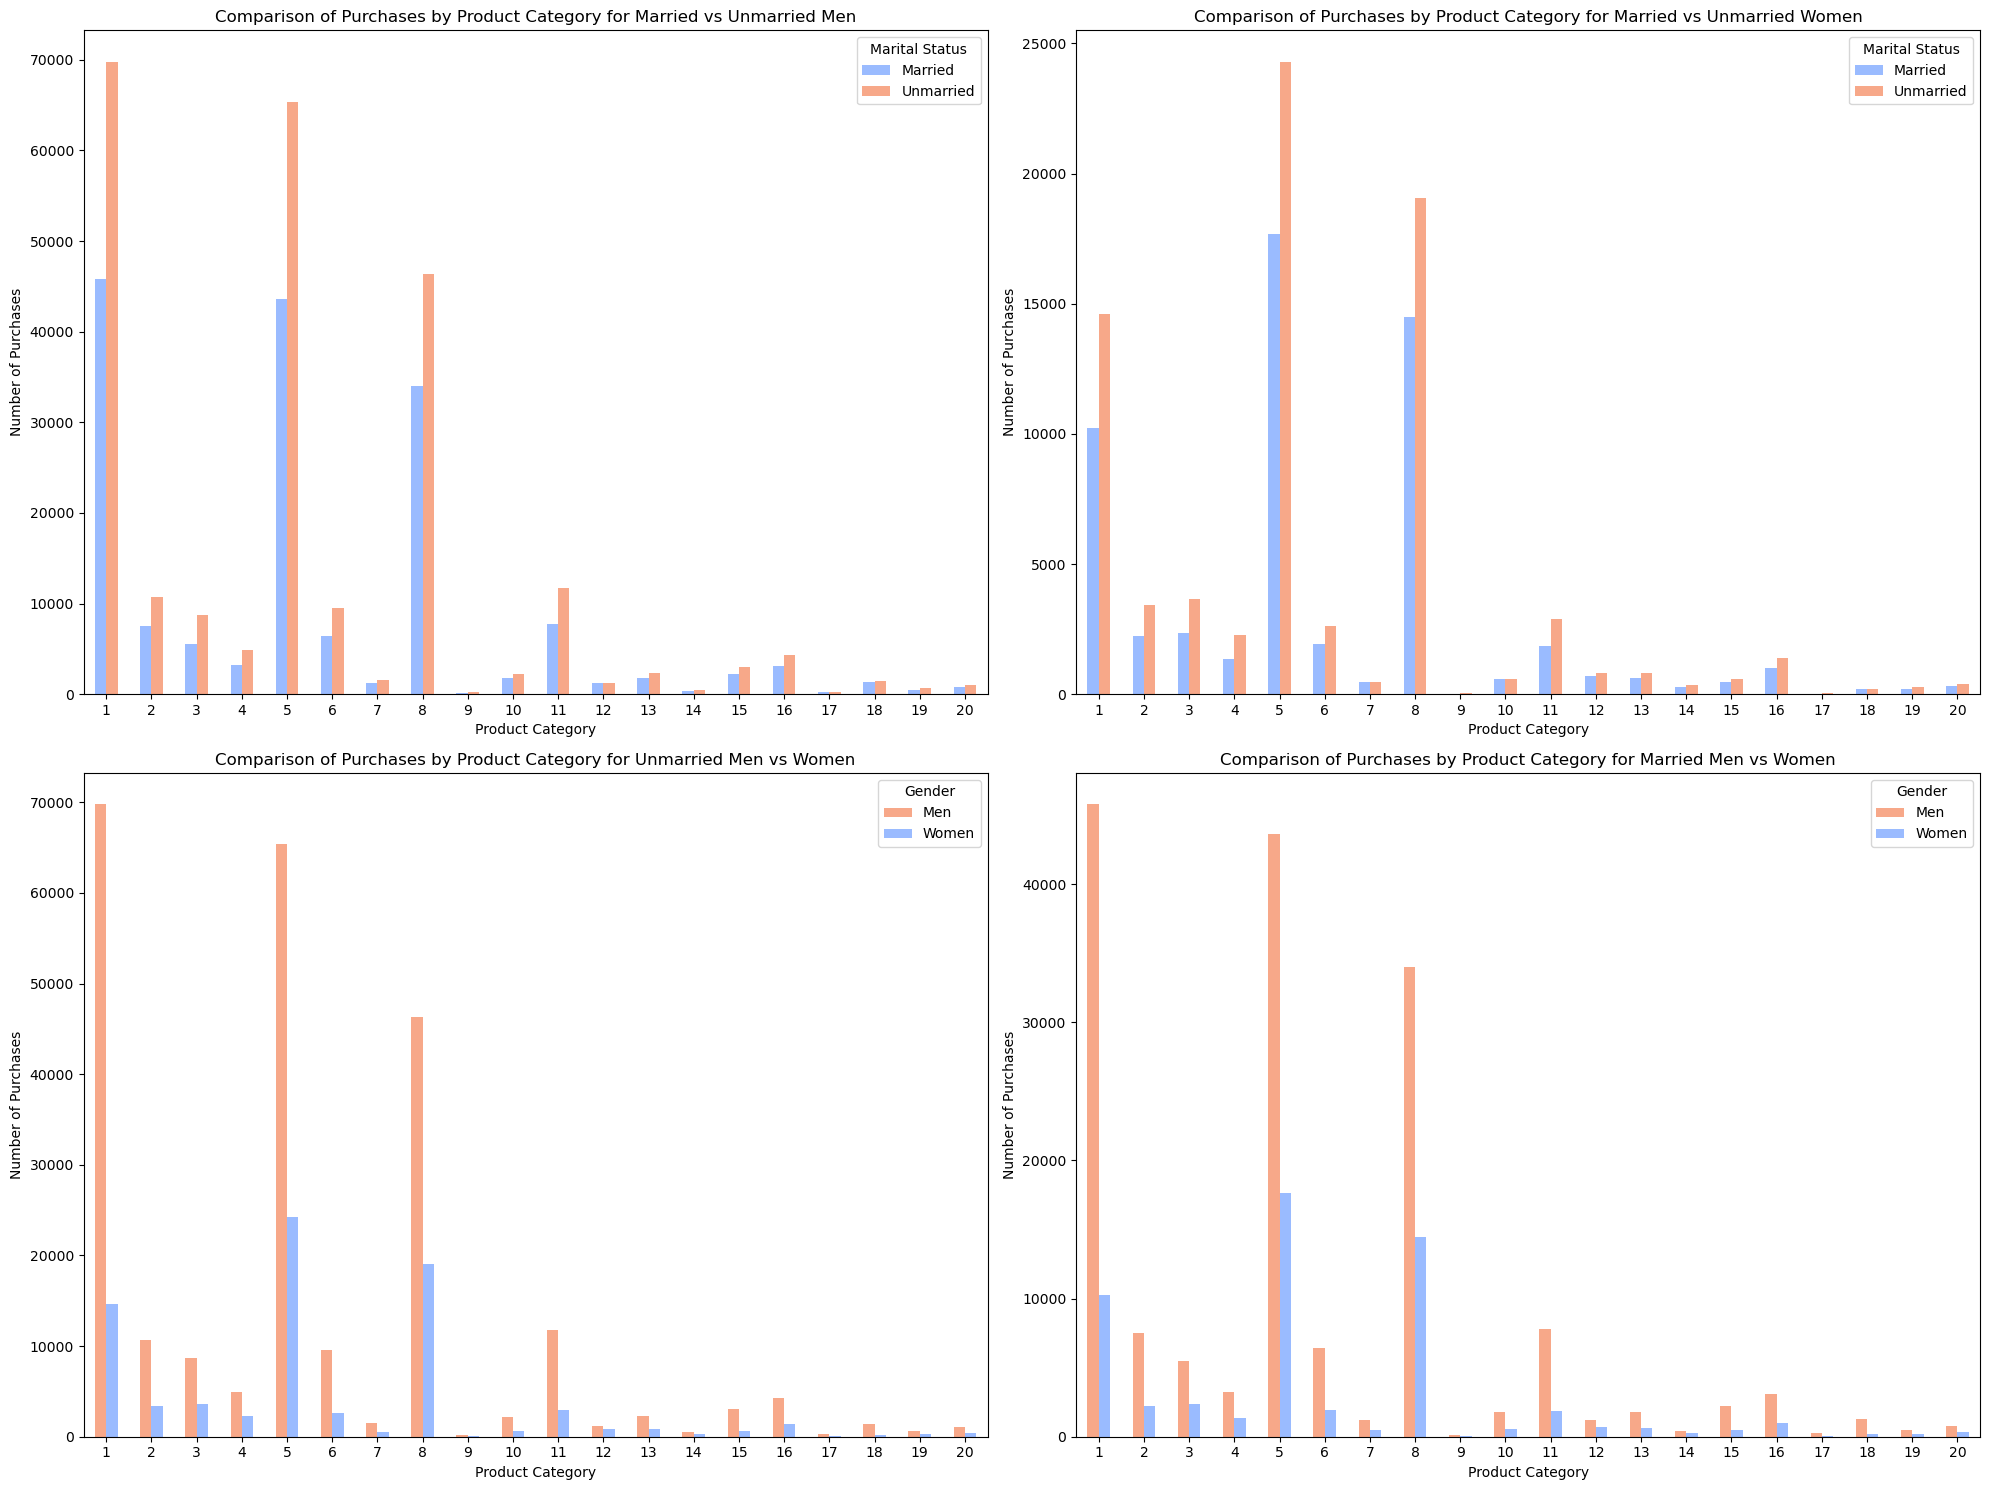

In [399]:
# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 색상 설정
# base1 : color for Married
# base2 : color for Unmarried

# 서브플롯 1 - 기혼 남성과 미혼 남성의 Product Category별 구매 수 비교
married_men = df[(df['Marital_Status'] == 1) & (df['Gender'] == 'M')]
unmarried_men = df[(df['Marital_Status'] == 0) & (df['Gender'] == 'M')]
married_product_counts = married_men['Product_Category'].value_counts().sort_index()
unmarried_product_counts = unmarried_men['Product_Category'].value_counts().sort_index()

product_counts_df = pd.DataFrame({
    'Married': married_product_counts,
    'Unmarried': unmarried_product_counts
}).fillna(0)

product_counts_df.plot(kind='bar', ax=axes[0, 0], color=[base1, base2])
axes[0, 0].set_title('Comparison of Purchases by Product Category for Married vs Unmarried Men')
axes[0, 0].set_xlabel('Product Category')
axes[0, 0].set_ylabel('Number of Purchases')
axes[0, 0].legend(title='Marital Status')
axes[0, 0].tick_params(axis='x', rotation=0)

# 서브플롯 2 - 기혼 여성과 미혼 여성의 Product Category별 구매 수 비교
married_women = df[(df['Marital_Status'] == 1) & (df['Gender'] == 'F')]
unmarried_women = df[(df['Marital_Status'] == 0) & (df['Gender'] == 'F')]
married_product_counts2 = married_women['Product_Category'].value_counts().sort_index()
unmarried_product_counts2 = unmarried_women['Product_Category'].value_counts().sort_index()

product_counts_df2 = pd.DataFrame({
    'Married': married_product_counts2,
    'Unmarried': unmarried_product_counts2
}).fillna(0)

product_counts_df2.plot(kind='bar', ax=axes[0, 1], color=[base1, base2])
axes[0, 1].set_title('Comparison of Purchases by Product Category for Married vs Unmarried Women')
axes[0, 1].set_xlabel('Product Category')
axes[0, 1].set_ylabel('Number of Purchases')
axes[0, 1].legend(title='Marital Status')
axes[0, 1].tick_params(axis='x', rotation=0)

# 서브플롯 3 - 미혼 남성과 미혼 여성의 Product Category별 구매 수 비교
unmarried_product_counts_men = unmarried_men['Product_Category'].value_counts().sort_index()
unmarried_product_counts_women = unmarried_women['Product_Category'].value_counts().sort_index()

product_counts_df_unmarried = pd.DataFrame({
    'Men': unmarried_product_counts_men,
    'Women': unmarried_product_counts_women
}).fillna(0)

product_counts_df_unmarried.plot(kind='bar', ax=axes[1, 0], color=[base2, base1])
axes[1, 0].set_title('Comparison of Purchases by Product Category for Unmarried Men vs Women')
axes[1, 0].set_xlabel('Product Category')
axes[1, 0].set_ylabel('Number of Purchases')
axes[1, 0].legend(title='Gender')
axes[1, 0].tick_params(axis='x', rotation=0)

# 서브플롯 4 - 기혼 남성과 기혼 여성의 Product Category별 구매 수 비교
married_product_counts_men = married_men['Product_Category'].value_counts().sort_index()
married_product_counts_women = married_women['Product_Category'].value_counts().sort_index()

product_counts_df_married = pd.DataFrame({
    'Men': married_product_counts_men,
    'Women': married_product_counts_women
}).fillna(0)

product_counts_df_married.plot(kind='bar', ax=axes[1, 1], color=[base2, base1])
axes[1, 1].set_title('Comparison of Purchases by Product Category for Married Men vs Women')
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Number of Purchases')
axes[1, 1].legend(title='Gender')
axes[1, 1].tick_params(axis='x', rotation=0)

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

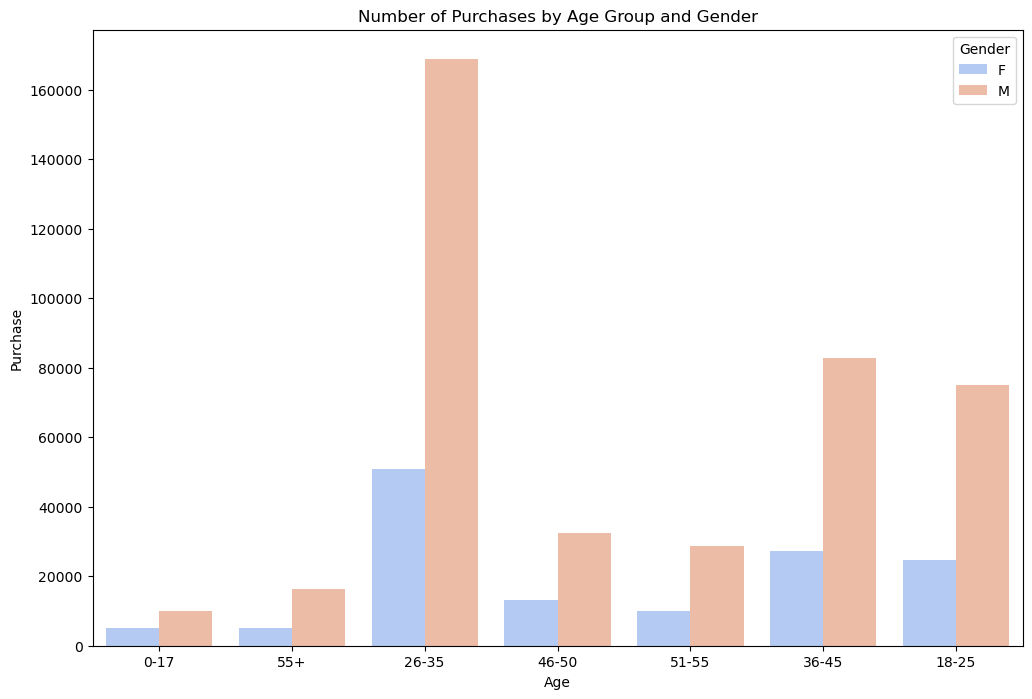

In [413]:
# 나이에 따라 남성과 여성의 상품 카테고리별 구매 수를 비교한다.
# 비교를 통해, 나이에 따라 구매 패턴이 달라짐을 예측해볼 수 있다.

plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Age',  hue= 'Gender', palette = 'coolwarm')

plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Number of Purchases by Age Group and Gender')
plt.legend(title = 'Gender')
plt.show()

상품 1, 5, 8은 혼인 여부와 성별, 에 관계없이

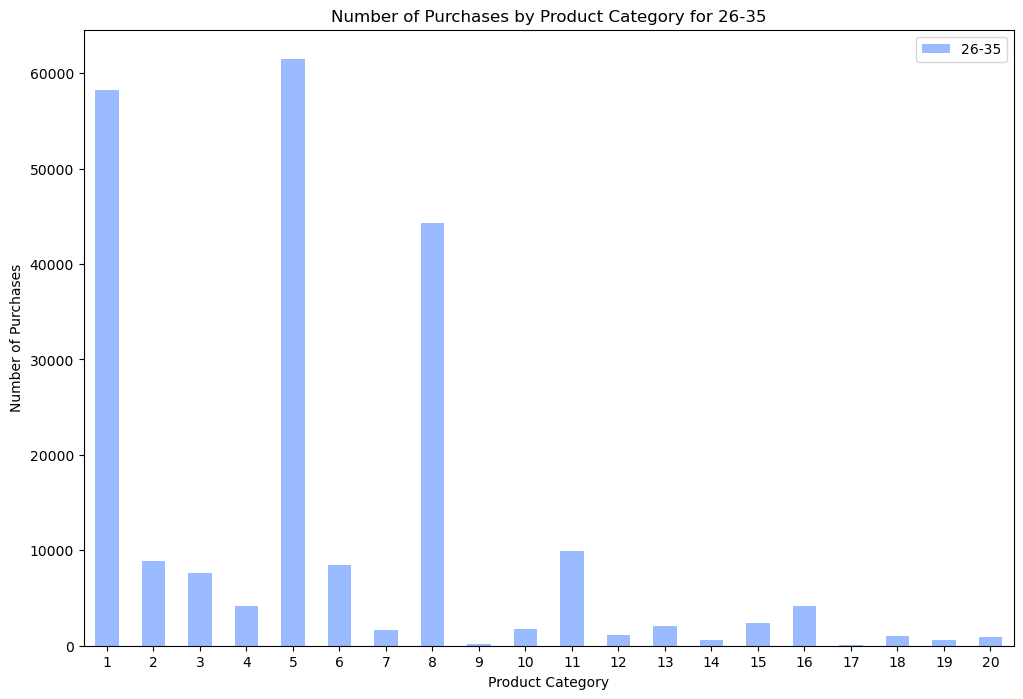

In [427]:
# 데이터 분할
late_twenty = df[(df['Age'] == '26-35') ]

# Product_Category 별 구매 수 계산
product_counts = late_twenty['Product_Category'].value_counts().sort_index()
# unmarried_product_counts2 = unmarried_women['Product_Category'].value_counts().sort_index()

# 데이터프레임 결합
product_counts = pd.DataFrame({
    '26-35': product_counts}).fillna(0)

# 시각화
product_counts.plot(kind='bar', figsize=(12, 8), color=base1)
plt.title('Number of Purchases by Product Category for 26-35')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
# plt.legend(title='Gender')
plt.show()


## **1. VIP 고객 대상으로 마케팅 전략 도출**

- VIP 고객은 누구인지 VIP에 대한 정의가 되어있는가?

## **2. 지역별 고객들의 구매 특징을 파악하여 마케팅 전략 도출**